In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
name = 'age_data.xls'
path = os.getcwd() + "\\" + name
path

'C:\\Users\\Victor\\OneDrive - ITMO UNIVERSITY\\J4132c\\Дискретные модели\\Practice\\age_data.xls'

In [3]:
sheets = pd.ExcelFile(path).sheet_names
sheets

['both; 1950-2005, estimates',
 'both; 2010-50, medium-fertility',
 'both; documentation',
 'm; 1950-2005, estimates',
 'm; 2010-50, medium-fertility',
 'm; documentation',
 'f; 1950-2005, estimates',
 'f; 2010-50, medium-fertility',
 'f; documentation']

In [4]:
both_1950_data = pd.read_excel(path, header = 6, sheet_name=sheets[0])
both_2010_data = pd.read_excel(path, header = 6, sheet_name=sheets[1])
m_1950_data = pd.read_excel(path, header = 6, sheet_name=sheets[3])
m_2010_data = pd.read_excel(path, header = 6, sheet_name=sheets[4])
f_1950_data = pd.read_excel(path, header = 6, sheet_name=sheets[6])
f_2010_data = pd.read_excel(path, header = 6, sheet_name=sheets[7])

In [5]:
def filtered_dataset(dataset, country_code = 643):
    return dataset[dataset['Country code'] == country_code]\
            .drop(columns = ['Index', 'Variant','Major area, region, country or area*','Notes', 'Country code'])\
            .rename(columns = {'Reference date (as of 1 July)': 'Year'})\
            .set_index('Year')

In [6]:
both_1950 = filtered_dataset(both_1950_data)
both_2010 = filtered_dataset(both_2010_data)
m_1950 = filtered_dataset(m_1950_data)
m_2010 = filtered_dataset(m_2010_data)
f_1950 = filtered_dataset(f_1950_data)
f_2010 = filtered_dataset(f_2010_data)

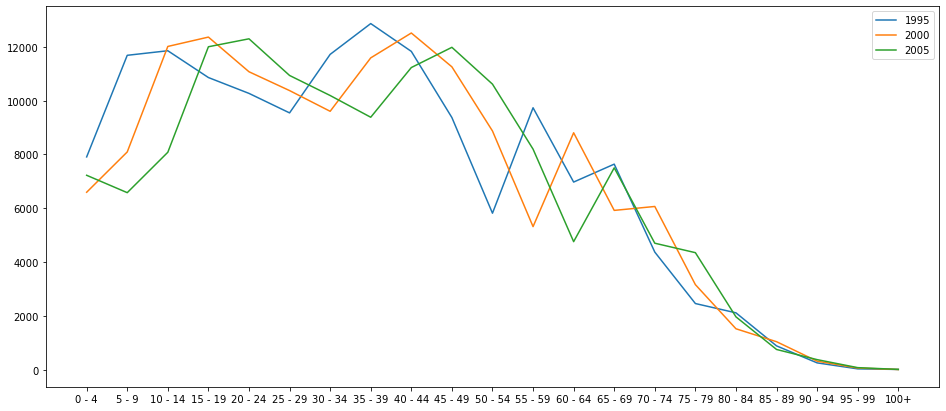

In [7]:
plt.figure(figsize = (16,7))
for year in both_1950.index[-3:]:
    plt.plot(both_1950.loc[year], label = f'{year}')
plt.legend()
plt.show();

In [8]:
category = both_1950.columns
category

Index(['0 - 4', '5 - 9', '10 - 14', '15 - 19', '20 - 24', '25 - 29', '30 - 34',
       '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64',
       '65 - 69', '70 - 74', '75 - 79', '80 - 84', '85 - 89', '90 - 94',
       '95 - 99', '100+'],
      dtype='object')

## Step 1
Calculate "survival" rate

In [9]:
def get_survival_rate(dataset, start_year, end_year):
    return pd.DataFrame(dataset.loc[end_year] / dataset.loc[start_year].shift(periods = 1), columns = [end_year]).drop('0 - 4').T

In [10]:
start_year = 2000
end_year = 2005
get_survival_rate(m_1950, start_year, end_year)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,0.996847,0.997783,0.996852,0.988477,0.976766,0.96945,0.961542,0.94961,0.932068,0.909411,0.880503,0.837488,0.781604,0.712807,0.629712,0.535573,0.43418,0.334591,0.244647,0.178293


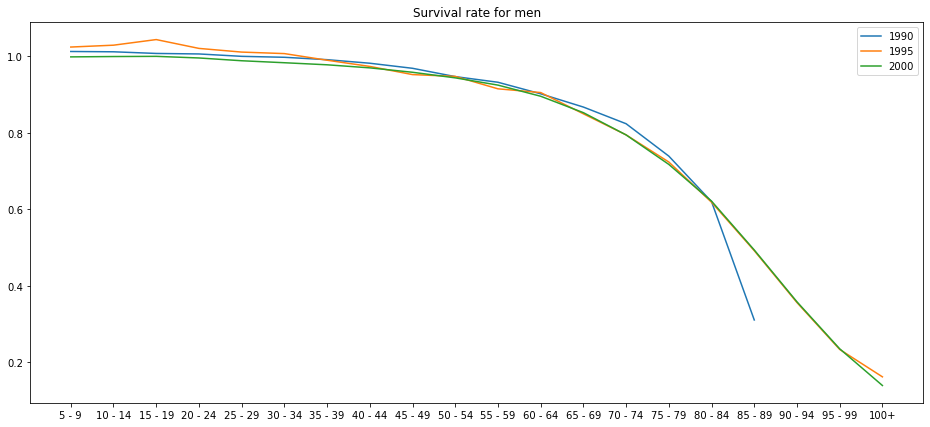

In [11]:
plt.figure(figsize = (16,7))
for year in m_1950.index[-4:-1]:
    plt.plot(get_survival_rate(both_1950, year, year+5).T, label = f'{year}')
plt.title('Survival rate for men')
plt.legend()
plt.show();

In [12]:
start_year = 2000
end_year = 2005
get_survival_rate(f_1950, start_year, end_year)

,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
2005,0.998494,0.999328,1.00129,1.00134,0.998498,0.995426,0.992336,0.987777,0.981334,0.972976,0.961185,0.938749,0.901176,0.844263,0.761203,0.648231,0.50973,0.36345,0.233542,0.13169


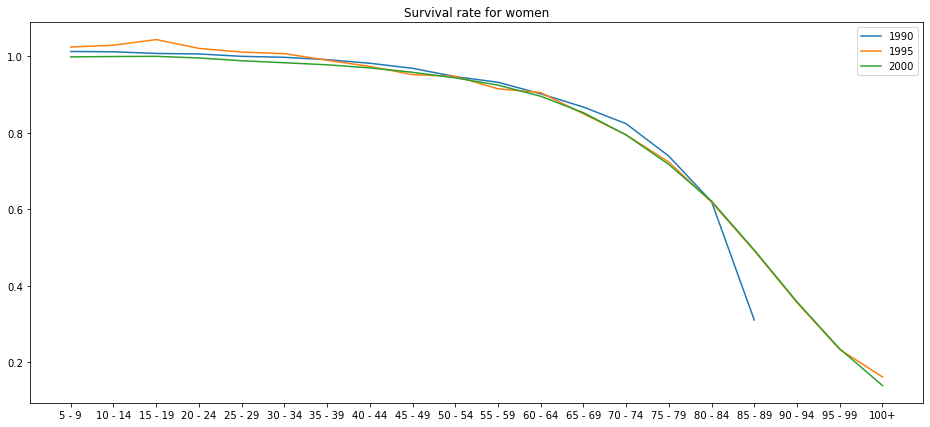

In [13]:
plt.figure(figsize = (16,7))
for year in f_1950.index[-4:-1]:
    plt.plot(get_survival_rate(both_1950, year, year+5).T, label = f'{year}')
plt.title('Survival rate for women')
plt.legend()
plt.show();

## Step 2 
Calculate farcility rate

In [14]:
def get_farcility_rate(year = 2005):
    return both_1950.loc[year, '0 - 4'] / f_1950.loc[year, ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum()

In [15]:
get_farcility_rate(2005)

0.2637541023664776

# Step 3
Predict population

In [16]:
years = []
for i in range(10):
    years.append(2005+ i*5)
years

[2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050]

In [39]:
def get_boy_prob():
    return pd.Series(m_1950.loc[:, category[0]] / both_1950.loc[:, category[0]]).mean(axis = 0)

def get_girl_prob():
    return pd.Series(f_1950.loc[:, category[0]] / both_1950.loc[:, category[0]]).mean(axis = 0)

In [43]:
# Model's parameter
survival_rate = get_survival_rate(both_1950, 2000, 2005).loc[2005]
fartility = get_farcility_rate(2005)
boy_probability = get_boy_prob()
girl_probability = get_girl_prob()


for i in range(len(years) -1):
    f_0 = f_1950.loc[years[i+1],category[0]] = fartility * f_1950.loc[years[i], ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum() * girl_probability
    f_1 = f_1950.loc[years[i+1],category[1:]] = survival_rate * f_1950.loc[years[i]].shift(periods = 1)
    m_0 = m_1950.loc[years[i+1],category[0]] = fartility * m_1950.loc[years[i], ['15 - 19','20 - 24', '25 - 29', '30 - 34', '35 - 39']].sum() * boy_probability
    m_1 = m_1950.loc[years[i+1],category[1:]] = survival_rate * m_1950.loc[years[i]].shift(periods = 1)
    both_1950.loc[years[i+1],category[0]] = f_0 + m_0
    both_1950.loc[years[i+1],category[1:]] = f_1 + m_1
both_1950

,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,35 - 39,40 - 44,45 - 49,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
Year,,,,,,,,,,,,,,,,,,,,,
1950,10040.654000,7404.651000,12243.902000,9911.185000,11714.593000,7326.393000,5952.458000,8134.329000,7007.098000,5823.587000,...,3416.889000,3086.258000,2421.912000,1781.928000,1183.114000,966.638000,NaN,NaN,NaN,NaN
1955,12636.752000,10005.433000,7398.446000,12220.918000,9851.465000,11616.414000,7257.741000,5872.028000,7976.624000,6795.936000,...,4022.217000,3108.480000,2695.539000,1982.140000,1314.513000,1075.782000,NaN,NaN,NaN,NaN
1960,13462.433000,12522.356000,9937.392000,7332.964000,12085.257000,9706.714000,11438.741000,7118.657000,5723.213000,7701.589000,...,5208.257000,3651.109000,2704.545000,2197.674000,1457.130000,1195.011000,NaN,NaN,NaN,NaN
1965,12124.980000,13344.161000,12434.071000,9856.447000,7237.965000,11927.177000,9549.954000,11230.174000,6950.253000,5529.573000,...,6054.348000,4757.644000,3204.997000,2222.478000,1630.470000,1344.957000,NaN,NaN,NaN,NaN
1970,9362.591000,12021.941000,13253.940000,12338.287000,9744.425000,7129.734000,11753.990000,9363.572000,10967.713000,6724.181000,...,6900.678000,5531.322000,4197.109000,2653.160000,1655.478000,1519.987000,NaN,NaN,NaN,NaN
1975,10102.461000,9353.026000,11824.666000,12879.968000,12157.342000,9646.768000,7086.269000,11556.195000,9087.538000,10615.392000,...,5057.612000,6369.305000,4886.831000,3428.375000,1904.137000,1664.044000,NaN,NaN,NaN,NaN
1980,10676.382000,10078.104000,9263.446000,11510.375000,13022.200000,12207.244000,10044.501000,6446.844000,11313.350000,8596.415000,...,6548.121000,4557.702000,5534.753000,4126.250000,2606.957000,1890.693000,NaN,NaN,NaN,NaN
1985,11640.253000,10718.877000,10118.611000,9342.099000,11681.805000,13039.490000,12125.472000,9847.728000,6302.915000,10885.348000,...,9567.094000,5972.347000,3995.155000,4550.564000,3014.876000,2347.505000,NaN,NaN,NaN,NaN
1990,11550.634000,11727.313000,10788.408000,10216.220000,9553.965000,11760.532000,12991.181000,12060.358000,9683.197000,6146.835000,...,7737.429000,8815.725000,5308.760000,3327.175000,3407.289000,2841.820000,NaN,NaN,NaN,NaN


In [41]:
def plot_comparison(year):
    plt.figure(figsize = (15,7))
    plt.plot(both_1950.loc[year], label = 'predict by me')
    plt.plot(both_2010.loc[year], label = 'predict by UN')
    plt.legend()
    plt.title('Comparison my and UN forecast')
    plt.show();

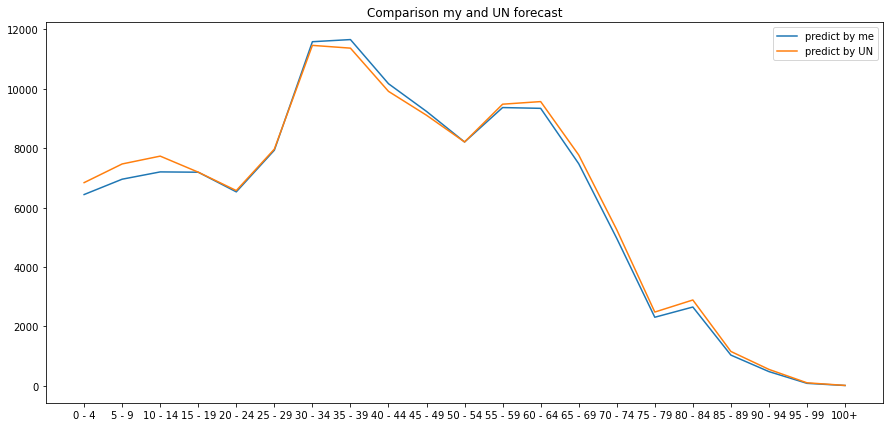

In [42]:
plot_comparison(2020)

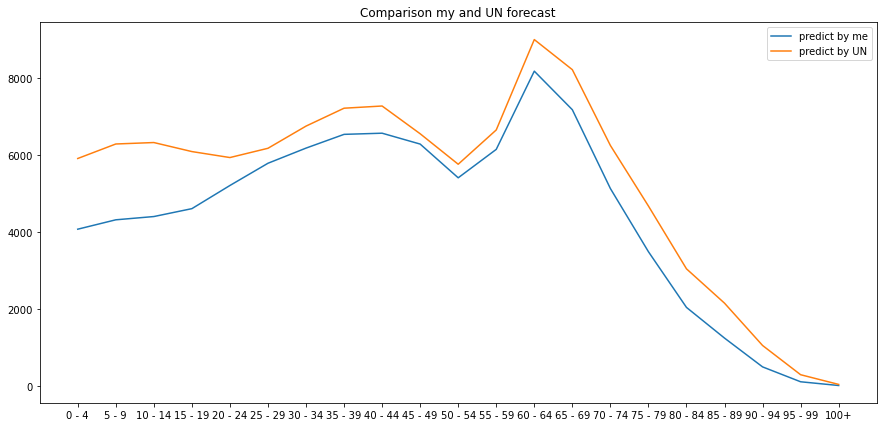

In [44]:
plot_comparison(2050)

## Draft

In [20]:
df = pd.DataFrame({"Col1": [10, 20],
                   "Col2": [13, 23],
                   "Col3": [17, 27]},
                  )
df

,Col1,Col2,Col3
0,10,13,17
1,20,23,27


In [21]:
df.loc[1]

Col1    20
Col2    23
Col3    27
Name: 1, dtype: int64